<a href="https://colab.research.google.com/github/mehedi832766/3D_CNN/blob/main/dataload_3D_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Installing Dependencies

In [ ]:

from keras.models import Sequential

from keras.layers import (Activation, Conv3D, Dense, Dropout, Flatten,
                          MaxPooling3D)
from keras.optimizers import SGD, RMSprop
from keras.utils import np_utils, generic_utils
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
# from sklearn import cross_validation
from sklearn import preprocessing
from glob import glob

#Data Preprocessing

In [ ]:
# Python program to demonstrate
import h5py


# # initializing a random numpy array


# reading dataset from a h5 file
with h5py.File('/content/drive/MyDrive/DATASets/3D_CNN_DataSet.h5', 'r') as f:

  #list of datasets
  # ls=list(f.keys())
  # print(ls)
  data=f.get('images')
  images=np.array(data)
  print(images.shape)
  data=f.get('labels')
  labels=np.array(data)
  print(labels.shape)

(390, 16, 16, 5)
(390,)


In [ ]:
num_samples = len(images)
img_rows,img_cols,img_depth=16,16,5
print(num_samples)

390


In [ ]:
train_data = [images,labels]

In [ ]:
train_data = [X_tr_array,label]

In [ ]:
(X_train, y_train) = (train_data[0],train_data[1])
print('X_Train shape:', X_train.shape)

X_Train shape: (390, 227, 227, 5)


In [ ]:
train_set = np.zeros((num_samples, 1, img_rows,img_cols,img_depth))

In [ ]:
for h in range(num_samples):
    train_set[h][0][:][:][:]=X_train[h,:,:,:]

In [ ]:
patch_size = 5    # img_depth or number of frames used for each video

In [ ]:
print(train_set.shape, 'train samples')

(390, 1, 227, 227, 5) train samples


In [ ]:
nb_classes = 39

In [ ]:
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)

In [ ]:
# Pre-processing

train_set = train_set.astype('float32')

train_set -= np.mean(train_set)

train_set /=np.max(train_set)

In [ ]:
# Split the data

# X_train_new, X_rem, y_train_new,y_rem =  train_test_split(train_set, Y_train, test_size=0.4, random_state=4)

In [ ]:
# X_test, X_val, y_test,y_val =  train_test_split(X_rem, y_rem, test_size=0.2, random_state=4)

In [ ]:
X_train_new,X_test,y_train_new, y_test =  train_test_split(train_set, Y_train, test_size=0.2, random_state=4)

#Model Building

In [ ]:
# number of convolutional filters to use at each layer
nb_filters = [32, 32]
# level of pooling to perform at each layer (POOL x POOL)
nb_pool = [1,1]
# level of convolution to perform at each layer (CONV x CONV)
nb_conv = [2,2]
filters=32
kernel_size=(3,3,2) 
batch_size = 2
nb_epoch =50

In [ ]:
# Define model

model = Sequential()
model.add(Conv3D(filters,
    kernel_size,
    strides=(1, 1, 1),
    padding="valid",
    data_format="channels_first",
    activation="relu",
    input_shape=(1, 227, 227, 5)    
    ))

model.add(MaxPooling3D(pool_size=(nb_pool[0], nb_pool[0], nb_pool[0])))

model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(nb_classes))

model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='RMSprop',
  metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d (Conv3D)             (None, 32, 225, 225, 4)   608       
                                                                 
 max_pooling3d (MaxPooling3D  (None, 32, 225, 225, 4)  0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 225, 225, 4)   0         
                                                                 
 flatten (Flatten)           (None, 6480000)           0         
                                                                 
 dense (Dense)               (None, 128)               829440128 
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                        

In [ ]:
# Train the model

hist = model.fit(X_train_new,y_train_new,validation_split=0.3, 
          steps_per_epoch=2,epochs = 50,shuffle=True)

Epoch 1/50


ResourceExhaustedError: ignored

In [ ]:
# Train the model

# hist = model.fit(train_set,Y_train,validation_data=(X_val_new,y_val_new), 
#           steps_per_epoch=batch_size,epochs = nb_epoch,shuffle=True)

#model evaluation

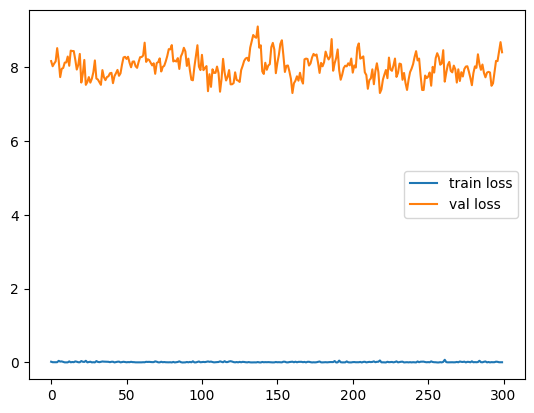

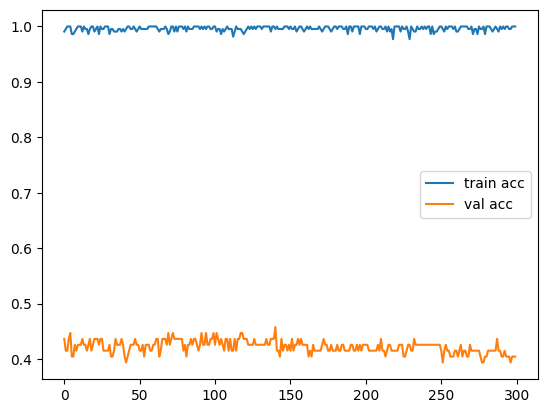

<Figure size 640x480 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(hist .history['loss'], label='train loss')
plt.plot(hist .history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('/content/drive/MyDrive/Thesis/model/vgg19/vLossVal_loss')

# plot the accuracy
plt.plot(hist .history['accuracy'], label='train acc')
plt.plot(hist .history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('/content/drive/MyDrive/Thesis/model/vgg19/vAccVal_acc')

In [ ]:
model.save('/content/drive/MyDrive/Thesis/action5.h5')

#Model Test

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
ypred = model.predict(X_test)
pred=np.argmax(ypred, axis=1)
ground = np.argmax(y_test,axis=1)
print(classification_report(ground,pred))

3/3 [==============================] - 0s 8ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         5
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         3
          11       0.00      0.00      0.00         4
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         4
          14       0.00      0.00      0.00         3
          15       0.00      0.00      0.00         0
          16       0.00      0

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1

#From image

In [ ]:
from tensorflow.keras.models import load_model
model=load_model('/content/drive/MyDrive/Thesis/action.h5')

In [ ]:
img_rows,img_cols,img_depth=16,16,5
X_ts=[]  

In [ ]:
vow="/content/drive/MyDrive/Thesis/sample"
con="/content/drive/MyDrive/Thesis/Con_Sign_Data_3.0"

In [ ]:
lc = []

In [ ]:

path = "/content/drive/MyDrive/Thesis/Con_Sign_Data_3.0/22. MA/New folder"
nlisting = os.listdir(path)
frames = []
for nvid in nlisting:
  nvid = path+"/"+nvid
  img= cv2.imread(os.path.join(nvid)) 
  frame=cv2.resize(img,(img_rows,img_cols),interpolation=cv2.INTER_AREA)
  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  frames.append(gray)

input=np.array(frames)

# print(input.shape)
ipt=np.rollaxis(np.rollaxis(input,2,0),2,0)
# print(ipt.shape)

X_ts.append(ipt)
  
lc.append(len(X_ts))

      

In [ ]:
X_tr_array = np.array(X_ts)   # convert the frames read into array

num_samples = len(X_tr_array)
print(num_samples)

1


In [ ]:
X_tr_array.shape

(1, 16, 16, 5)

In [ ]:
test_set = np.zeros(( 1,1, img_rows,img_cols,img_depth))

In [ ]:
test_set.shape

(1, 1, 16, 16, 5)

In [ ]:
test_set[0]=X_tr_array

In [ ]:
test_set.shape

(1, 1, 16, 16, 5)

In [ ]:
r = model.predict(test_set)

1/1 [==============================] - 0s 51ms/step


In [ ]:
label = ['@1. A', '@2. AA', '@3. E', '@4. U', '@5. Y', '@6. O','01. KA', '02. KHA', '03. GA', '04. GHA', '05. CHA', '06. SCHA', '07. JA', '08. JHA', '09. TA', '10. THA', '11. DA', '12. DHA', '13. TO', '14. THO', '15. DO', '16. DHO', '17. NA', '18. PA', '19. PHA', '20. BA', '21. BHA', '22. MA', '23. YA', '24. RA', '25. LA', '26. SA', '27. HA', '28. RHA', '29. UN', '30. BI', 'joint', 'space', 'stop']

In [ ]:
result=np.argmax(r, axis=1)

In [ ]:
print(label[result[0]])

22. MA


#detection from video

In [ ]:
from tensorflow.keras.models import load_model
model=load_model('/content/drive/MyDrive/Thesis/action.h5')

In [ ]:
label = ['A', 'AA', 'E', 'U', 'Y', 'O','KA', 'KHA', 'GA', 'GHA', 'CHA', 'SCHA', 'JA', 'JHA', 'TA', 'THA', 'DA', 'DHA', 'TO', 'THO', 'NA', 'PA', 'PHA', 'BA', 'BHA', 'MA', 'YA', 'RA', 'LA', 'SA', 'HA', 'RHA', 'UN', 'BI', 'joint', 'space', 'stop', 'DO', 'DHO']

In [ ]:
def pred(vid):
  # image specification
  img_rows,img_cols,img_depth=16,16,5


  # Training data

  X=[]           # variable to store entire dataset

  #Reading boxing action class

  # listing = os.listdir('/content/drive/MyDrive/sample video')

  # vid = "/content/drive/MyDrive/sample video/GA/2023-01-30 113457.mp4"
  frames = []
  cap = cv2.VideoCapture(vid)
  fps = cap.get(5)
  # print "Frames per second using video.get(cv2.cv.CV_CAP_PROP_FPS): {0}".format(fps)


  for k in range(5):
    ret, frame = cap.read()
    frame=cv2.resize(frame,(img_rows,img_cols),interpolation=cv2.INTER_AREA)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    frames.append(gray)

    # plt.imshow(gray, cmap = plt.get_cmap('gray'))
    # plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
    # plt.show()
    # cv2.imshow('frame',gray)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
  cap.release()
  cv2.destroyAllWindows()

  input=np.array(frames)

  # print (input.shape)
  ipt=np.rollaxis(np.rollaxis(input,2,0),2,0)
  # print (ipt.shape)

  X.append(ipt)

  X_array = np.array(X)   # convert the frames read into array

  num_samples = len(X_array)
  # print(num_samples)

  test_set = np.zeros(( 1,1, img_rows,img_cols,img_depth))

  test_set[0]=X_array

  r = model.predict(test_set)

  result=np.argmax(r, axis=1)
  print(r)
  return label[result[0]]

In [ ]:
print(pred("/content/drive/MyDrive/Thesis/3d_cnn/sample2.mp4"))

1/1 [==============================] - 0s 16ms/step
[[0.02366757 0.02378136 0.02909479 0.02768926 0.03605746 0.02157317
  0.02524723 0.03405183 0.02109072 0.02106313 0.02844373 0.02143496
  0.02345188 0.02250646 0.01837191 0.02321248 0.02927409 0.02248021
  0.02191471 0.02113779 0.0320736  0.02858669 0.02768406 0.03305796
  0.02845567 0.0303918  0.02747524 0.02762074 0.03276141 0.02177406
  0.03423    0.02935882 0.01942989 0.02457927 0.02456925 0.02819029
  0.01453613 0.01490881 0.0247716 ]]
Y


#habijabi

In [ ]:
from google.colab.patches import cv2_imshow

Frames per second using video.get(cv2.cv.CV_CAP_PROP_FPS): 15.058299642585105


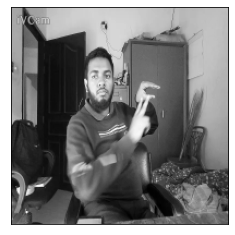

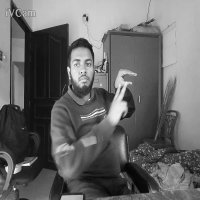

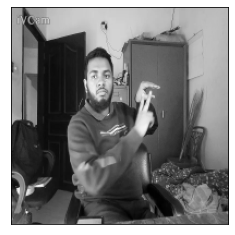

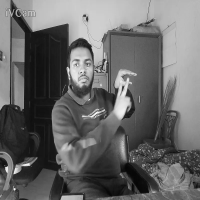

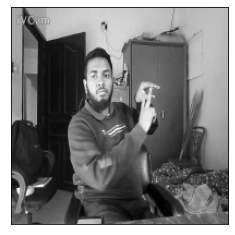

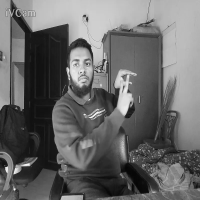

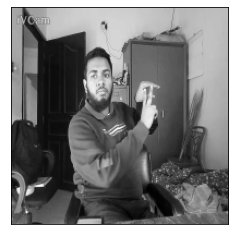

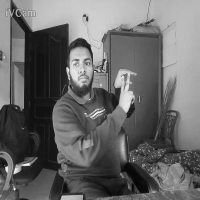

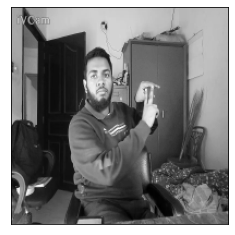

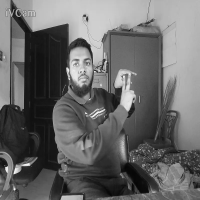

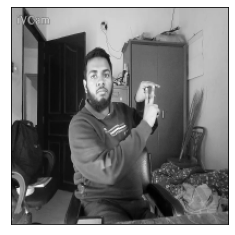

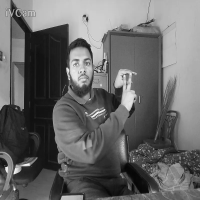

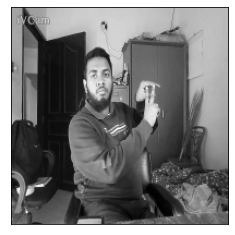

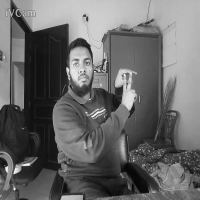

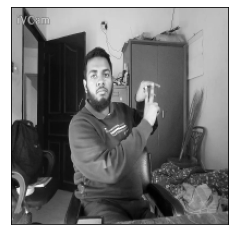

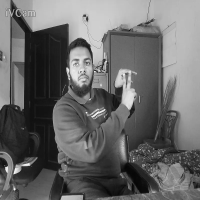

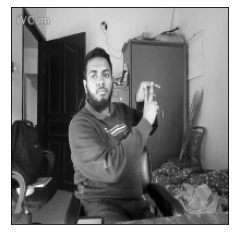

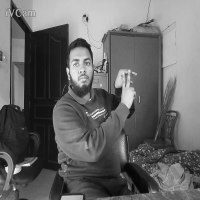

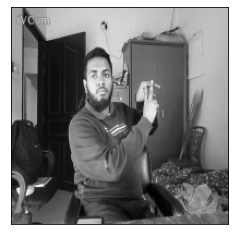

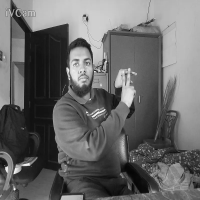

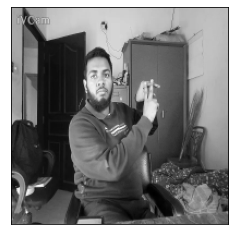

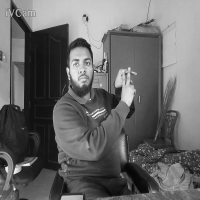

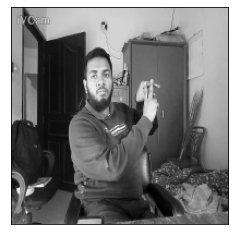

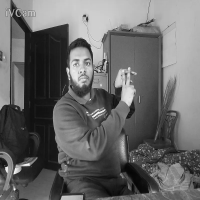

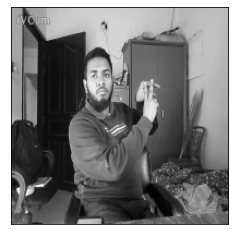

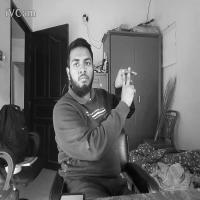

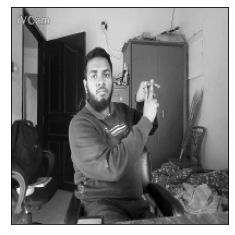

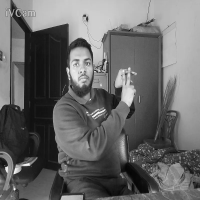

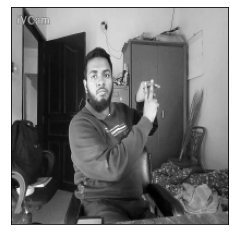

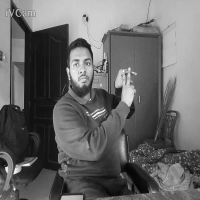

In [ ]:
vid = "/content/drive/MyDrive/sample video/2023-01-30 152843.mp4"
frames = []
cap = cv2.VideoCapture(vid)
fps = cap.get(5)
print ("Frames per second using video.get(cv2.cv.CV_CAP_PROP_FPS): {0}".format(fps))


for k in range(15):
  ret, frame = cap.read()
  frame=cv2.resize(frame,(200,200),interpolation=cv2.INTER_AREA)
  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  frames.append(gray)

  plt.imshow(gray, cmap = plt.get_cmap('gray'))
  plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
  plt.show()
  cv2_imshow(gray)

  if cv2.waitKey(1) & 0xFF == ord('q'):
      break
cap.release()
cv2.destroyAllWindows()

In [ ]:
len(frames)

15

In [ ]:
del frames[0:10]

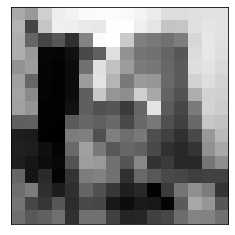

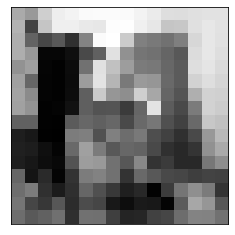

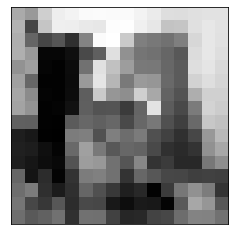

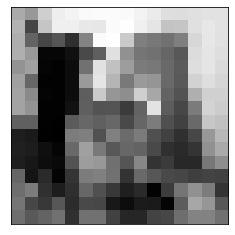

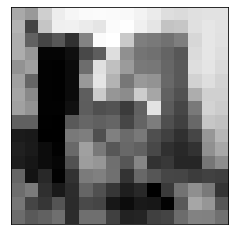

In [ ]:
for k in range(5):
  # ret, frame = cap.read()
  # frame=cv2.resize(frame,(480,340),interpolation=cv2.INTER_AREA)
  # gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  # frames.append(gray)

  plt.imshow(frames[k], cmap = plt.get_cmap('gray'))
  plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
  plt.show()
  cv2_imshow(gray)

  if cv2.waitKey(1) & 0xFF == ord('q'):
      break
cap.release()
cv2.destroyAllWindows()

In [ ]:
X_array.shape

(1, 16, 16, 5)

In [ ]:
test_set.shape

(1, 1, 16, 16, 5)

In [ ]:
test_set.shape

(1, 1, 16, 16, 5)

1/1 [==============================] - 0s 22ms/step


In [ ]:
result

array([36])

In [ ]:
# result=np.argmax(r, axis=1)


@6. O


#Data Load Raw


In [ ]:
img_rows,img_cols,img_depth=227,227,5
X_tr=[]  

In [ ]:
vow="/content/drive/MyDrive/Thesis/sample"
con="/content/drive/MyDrive/Thesis/Con_Sign_Data_3.0"

In [ ]:
path="/content/drive/MyDrive/Thesis/Untitled_F"

In [ ]:
path="/content/drive/MyDrive/Thesis/Untitled_F"

In [ ]:
lc = []

In [ ]:
listing = os.listdir(path)
listing.sort()
for vid in listing:
      vid = path+"/"+vid
      print(vid)

/content/drive/MyDrive/Thesis/Untitled_F/01.KA
/content/drive/MyDrive/Thesis/Untitled_F/02. KHA
/content/drive/MyDrive/Thesis/Untitled_F/03. GA
/content/drive/MyDrive/Thesis/Untitled_F/04. GHA
/content/drive/MyDrive/Thesis/Untitled_F/05. CHA
/content/drive/MyDrive/Thesis/Untitled_F/06. SCHA
/content/drive/MyDrive/Thesis/Untitled_F/07. JA
/content/drive/MyDrive/Thesis/Untitled_F/08. JHA
/content/drive/MyDrive/Thesis/Untitled_F/09. TA
/content/drive/MyDrive/Thesis/Untitled_F/10. THA
/content/drive/MyDrive/Thesis/Untitled_F/11. DA
/content/drive/MyDrive/Thesis/Untitled_F/12. DHA
/content/drive/MyDrive/Thesis/Untitled_F/13. TO
/content/drive/MyDrive/Thesis/Untitled_F/14. THO
/content/drive/MyDrive/Thesis/Untitled_F/15. DO
/content/drive/MyDrive/Thesis/Untitled_F/16. DHO
/content/drive/MyDrive/Thesis/Untitled_F/17. NA
/content/drive/MyDrive/Thesis/Untitled_F/18. PA
/content/drive/MyDrive/Thesis/Untitled_F/19. PHA
/content/drive/MyDrive/Thesis/Untitled_F/20. BA
/content/drive/MyDrive/Thesis/

In [ ]:
#ALL
i=0
for vid in listing:
      if(i==5):break
      vid = path+"/"+vid
      nlisting = os.listdir(vid)
      for nvid in nlisting:
        nvid = vid+"/"+nvid
        frames = []
        for img in os.listdir(nvid):
            img= cv2.imread(os.path.join(nvid,img)) 
            frame=cv2.resize(img,(img_rows,img_cols),interpolation=cv2.INTER_AREA)
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            frames.append(gray)

        input=np.array(frames)

        # print(input.shape)
        ipt=np.rollaxis(np.rollaxis(input,2,0),2,0)
        # print(ipt.shape)

        X_tr.append(ipt)
        i=i+1
      lc.append(len(X_tr))

In [ ]:
# Vowel
for vid in listing:
      vid = vow+"/"+vid
      nlisting = os.listdir(vid)
      for nvid in nlisting:
        nvid = vid+"/"+nvid
        frames = []
        for img in os.listdir(nvid):
            img= cv2.imread(os.path.join(nvid,img)) 
            frame=cv2.resize(img,(img_rows,img_cols),interpolation=cv2.INTER_AREA)
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            frames.append(gray)

        input=np.array(frames)

        # print(input.shape)
        ipt=np.rollaxis(np.rollaxis(input,2,0),2,0)
        # print(ipt.shape)

        X_tr.append(ipt)
        
      lc.append(len(X_tr))

      

In [ ]:
listing = os.listdir(con)
listing.sort()
for vid in listing:
      vid = con+"/"+vid
      print(vid)

/content/drive/MyDrive/Thesis/Con_Sign_Data_3.0/20. BA
/content/drive/MyDrive/Thesis/Con_Sign_Data_3.0/21. BHA
/content/drive/MyDrive/Thesis/Con_Sign_Data_3.0/22. MA


In [ ]:
# Consonent
for vid in listing:
      vid = con+"/"+vid
      nlisting = os.listdir(vid)
      for nvid in nlisting:
        nvid = vid+"/"+nvid
        frames = []
        for img in os.listdir(nvid):
            img= cv2.imread(os.path.join(nvid,img)) 
            frame=cv2.resize(img,(img_rows,img_cols),interpolation=cv2.INTER_AREA)
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            frames.append(gray)

        input=np.array(frames)

        # print(input.shape)
        ipt=np.rollaxis(np.rollaxis(input,2,0),2,0)
        # print(ipt.shape)

        X_tr.append(ipt)
        
      lc.append(len(X_tr))

      

In [ ]:
len(lc)

39

In [ ]:
X_tr_array = np.array(X_tr)   # convert the frames read into array

num_samples = len(X_tr_array)
print(num_samples)

390


In [ ]:
X_tr_array.shape

(390, 227, 227, 5)

In [ ]:
lc

[9,
 19,
 29,
 38,
 47,
 55,
 64,
 73,
 82,
 92,
 101,
 111,
 121,
 132,
 143,
 154,
 165,
 175,
 186,
 197,
 208,
 219,
 230,
 241,
 252,
 263,
 273,
 283,
 292,
 302,
 312,
 322,
 332,
 342,
 352,
 363,
 372,
 381,
 390]

##Labeling

In [ ]:
#Assign Label to each class
label=np.ones((num_samples,),dtype = int)
label[0:9]= 0
label[9:19] = 1
label[19:29] = 2
label[29:38] = 3
label[38:47]= 4
label[47:55] = 5
label[55:64]= 6
label[64:73] = 7
label[73:82] = 8
label[82:92] = 9
label[92:101]= 10
label[101:111] = 11
label[111:121]= 12
label[121:132] = 13
label[132:143] = 14
label[143:154] = 15
label[154:165]= 16
label[165:175] = 17
label[175:186]= 18
label[186:197] = 19
label[197:208] = 20
label[208:219] = 21
label[219:230]= 22
label[230:241] = 23
label[241:252]= 24
label[252:263] = 25
label[263:273] = 26
label[273:283] = 27
label[283:292]= 28
label[292:302] = 29
label[302:312]= 30
label[312:322] = 31
label[322:332] = 32
label[332:342] = 33
label[342:352]= 34
label[352:363] = 35
label[363:372]= 36
label[372:381] = 37
label[381:] = 38


In [ ]:
stop

NameError: ignored